# ABOUT:
- this notebook explores **renttherunway Dataset** from RecSys Dataset repository (repository of recommender system datasets)
- insight:
    - it is as expected that, **many items and users are cold** 
        - i will exclude all cold items and users from training of CF recommenders
        - for these cold items and users, i will likely build an alternative feature so that they can still be recommended in the recommendation system
    - there isn't images available, so likely i would simulate images using Deep Fashion Multi Modal Dataset because i want to be able to show images when the recommendations are made

In [5]:
import gzip
import json
import pandas as pd
import seaborn as sb

### read data

In [2]:
renttherunway_path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\FYP - GNN\data\RecSys Datasets\renttherunway_final_data.json.gz"
RUNWAY_COLS = ["user_id", "item_id", "rating", "review_date", "review_summary", "review_text", "rented for", "category", "body type"]

In [3]:
def read_review_data(path):
    def convert_json(json_string):
        try:
            return json.loads(json_string)
        except ValueError:
            return  
    with gzip.open(path, 'r') as fin:                # 4. gzip
        json_bytes = fin.read()                      # 3. bytes (i.e. UTF-8)
        json_str = json_bytes.decode('utf-8').split("\n")           # 2. string (i.e. JSON)
        data = []
        for elem in json_str:
            tmp_elem = convert_json(elem)
            if tmp_elem is None:
                continue
            data.append(tmp_elem)
    return data

In [6]:
renttherunway_data = pd.DataFrame(read_review_data(renttherunway_path))
renttherunway_data = renttherunway_data[RUNWAY_COLS]

In [68]:
renttherunway_data

,user_id,item_id,rating,review_date,review_summary,review_text,rented for,category,body type
0,420272,2260466,10,"April 20, 2016",So many compliments!,An adorable romper! Belt and zipper were a lit...,vacation,romper,hourglass
1,273551,153475,10,"June 18, 2013",I felt so glamourous!!!,I rented this dress for a photo shoot. The the...,other,gown,straight & narrow
2,360448,1063761,10,"December 14, 2015",It was a great time to celebrate the (almost) ...,This hugged in all the right places! It was a ...,party,sheath,NaN
3,909926,126335,8,"February 12, 2014",Dress arrived on time and in perfect condition.,I rented this for my company's black tie award...,formal affair,dress,pear
4,151944,616682,10,"September 26, 2016",Was in love with this dress !!!,I have always been petite in my upper body and...,wedding,gown,athletic
...,...,...,...,...,...,...,...,...,...
192539,66386,2252812,10,"May 18, 2016",LOVE IT!!! First Item Im thinking of buying!,Fit like a glove!,work,jumpsuit,hourglass
192540,118398,682043,10,"September 30, 2016",LOVE it!,The pattern contrast on this dress is really s...,work,dress,petite
192541,47002,683251,6,"March 4, 2016","Loud patterning, flattering fit","Like the other DVF wraps, the fit on this is f...",everyday,dress,straight & narrow
192542,961120,126335,10,"November 25, 2015",loved this dress it was comfortable and photog...,This dress was PERFECTION. it looked incredib...,wedding,dress,pear


### exploration

In [17]:
user_counts  = renttherunway_data['user_id'].value_counts()
item_counts  = renttherunway_data['item_id'].value_counts()

- it is expected that most users and items are cold - very few interactions

In [42]:
print("User Counts:", user_counts.describe(), sep = "\n")
print("Item Counts:", item_counts.describe(), sep = "\n")

User Counts:
count    105571.000000
mean          1.823834
std           3.074324
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         436.000000
Name: user_id, dtype: float64
Item Counts:
count    5850.000000
mean       32.913504
std        85.000916
min         1.000000
25%         5.000000
50%        14.000000
75%        32.000000
max      2241.000000
Name: item_id, dtype: float64


[Text(0, 0.5, 'Density'),
 Text(0.5, 1.0, 'Top 5000 Frequent Users'),
 Text(0.5, 0, 'Number of times rented')]

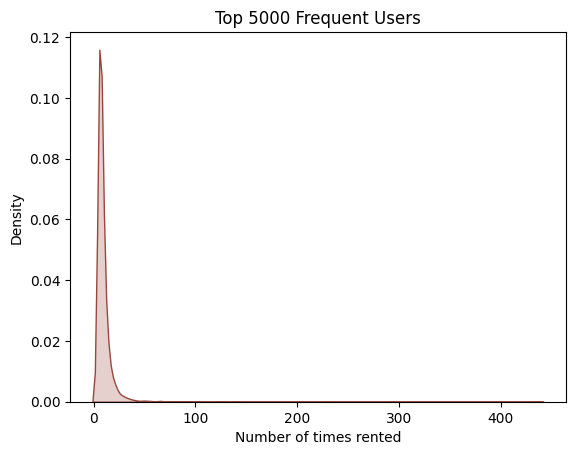

In [67]:
p  = sb.kdeplot(user_counts[:5000],  color = "#98473E", fill = True)
p.set(ylabel = "Density", title = "Top 5000 Frequent Users", xlabel = "Number of times rented")

[Text(0, 0.5, 'Density'),
 Text(0.5, 1.0, 'Top 5000 Frequent Items'),
 Text(0.5, 0, 'Number of times rented')]

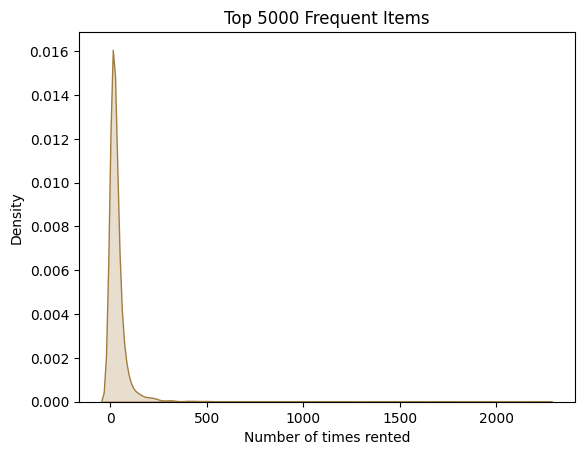

In [64]:
p  = sb.kdeplot(item_counts[:5000], color = "#A37C40", fill = True)
p.set(ylabel = "Density", title = "Top 5000 Frequent Items", xlabel = "Number of times rented")